In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/content/country_wise_latest.csv'
data = pd.read_csv(file_path)

In [3]:
# Preview the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526      

In [4]:
# Data Preprocessing
# Remove duplicate rows
data = data.drop_duplicates()

# Remove rows with null values
data = data.dropna()

# Verify the cleaned data
print("\nCleaned Dataset Info:")
print(data.info())


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region         

In [5]:
# Compute summary statistics
print("\nSummary Statistics:")
data.describe()


Summary Statistics:


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


<Figure size 1200x600 with 0 Axes>

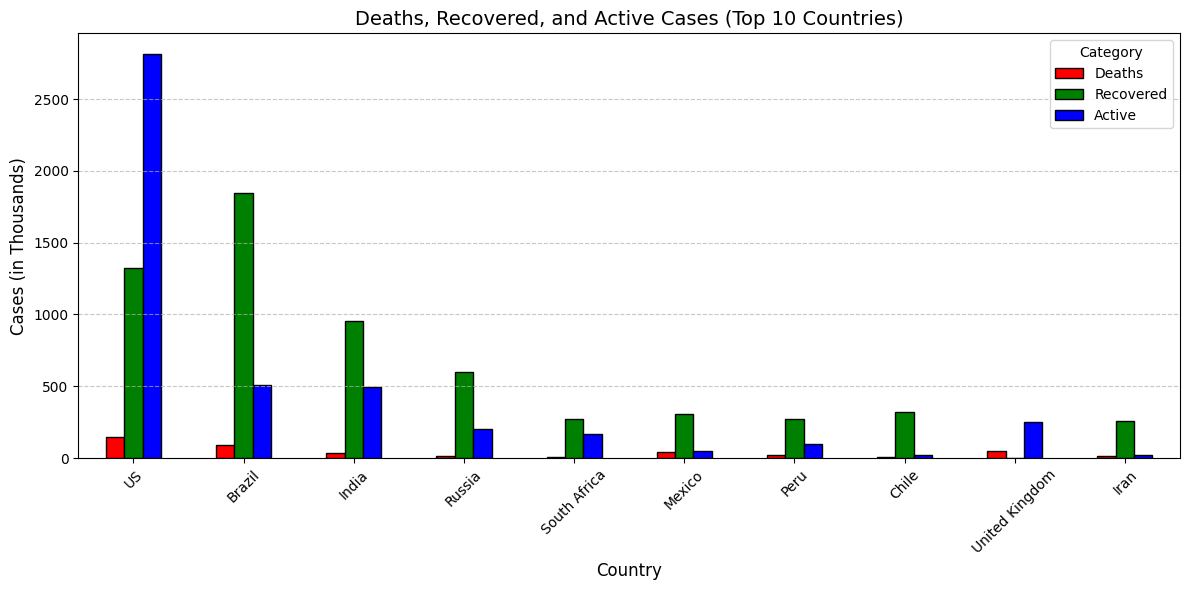

In [6]:
# Create visualizations
# Grouped Bar Plot: Deaths, Recovered, and Active cases for the top 10 countries
plt.figure(figsize=(12, 6))

# Data preparation
top_10_confirmed = data.nlargest(10, 'Confirmed')
top_10_data = top_10_confirmed[['Country/Region', 'Deaths', 'Recovered', 'Active']]
top_10_data = top_10_data.set_index('Country/Region')
top_10_data = top_10_data / 1000  # Scale to thousands for better readability

# Plotting
top_10_data.plot(kind='bar', figsize=(12, 6), stacked=False, color=['red', 'green', 'blue'], edgecolor='black')

# Formatting the plot
plt.title('Deaths, Recovered, and Active Cases (Top 10 Countries)', fontsize=14)
plt.ylabel('Cases (in Thousands)', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

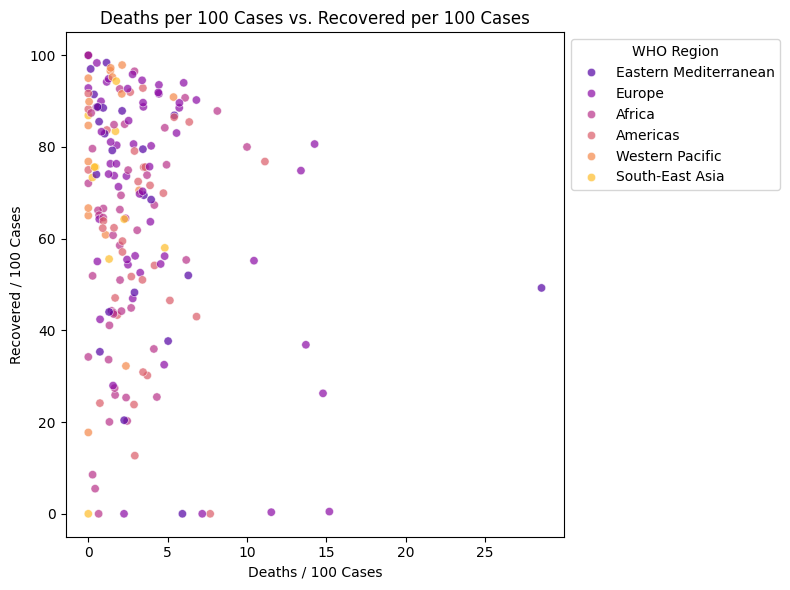

In [7]:
# Scatter Plot: Deaths / 100 Cases vs. Recovered / 100 Cases
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Deaths / 100 Cases', y='Recovered / 100 Cases', hue='WHO Region', palette='plasma', alpha=0.7)
plt.title('Deaths per 100 Cases vs. Recovered per 100 Cases')
plt.xlabel('Deaths / 100 Cases')
plt.ylabel('Recovered / 100 Cases')
plt.legend(title='WHO Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

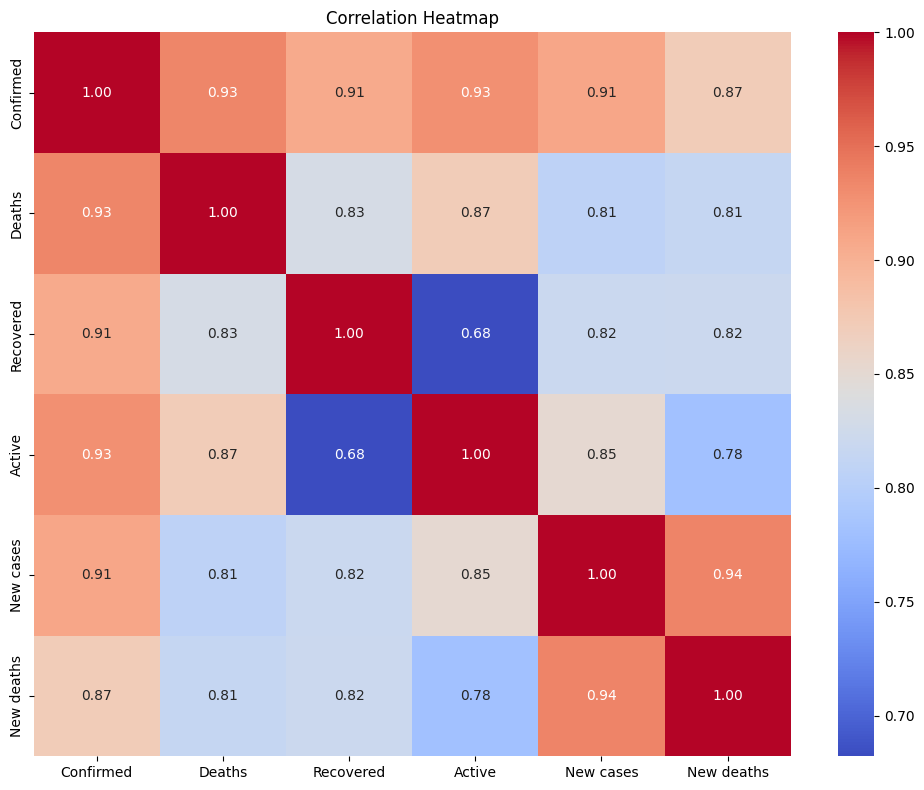

In [8]:
# Heatmap: Correlation between numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()